## **THE APRIORI ALGORITHM**

In [24]:
import pandas as pd
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


path = r'C:\Users\moham\Apriori_VS_Word2Vec\Dataset'
excel_file = 'df_merged_items_category.xlsx'
excel_file_path = os.path.join(path, excel_file)

def load_dataset(file_path):
    return pd.read_excel(file_path)

data_excel = load_dataset(excel_file_path)
basket = data_excel.groupby('BillNo')['Itemname'].apply(list)


data_excel.dropna(subset=['Itemname'], inplace=True)   

In [25]:
# Convert the basket into a one-hot encoded DataFrame
# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit the encoder to the basket data and transform it into a binary matrix
# Each row represents a transaction, each column represents an item
# A 'True' value means the item is present in that transaction
te_ary = te.fit(basket).transform(basket)

# Create a DataFrame from the binary matrix with item names as columns
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display info about the transformed data
print(f"Transaction matrix shape: {te_ary.shape} (transactions × unique items)")
print(f"Number of unique items: {len(te.columns_)}")

# Display a sample of the original basket data for reference
print("\nSample of original transaction baskets:")
print(basket.head())

Transaction matrix shape: (20208, 4185) (transactions × unique items)
Number of unique items: 4185

Sample of original transaction baskets:
BillNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
Name: Itemname, dtype: object


In [26]:

# Generate frequent itemsets using the Apriori algorithm
# `min_support=0.01` specifies the minimum support threshold for an itemset to be considered frequent
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
# `metric="confidence"` specifies that the rules should be evaluated based on confidence
# `min_threshold=0.05` sets the minimum confidence threshold for the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

In [27]:
# Generate association rules from the frequent itemsets
# `metric="lift"` specifies that the rules should be evaluated based on lift
# `min_threshold=1.2` sets the minimum lift threshold for the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [28]:
# Add a new column "antecedent_len" to the rules DataFrame
# This column calculates the length of the antecedents for each rule
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

In [36]:
filtered_rules = rules[(rules['antecedent_len'] >= 2) &
                                      (rules['confidence'] > 0.75) &
                                      (rules['lift'] > 1.2)]

filtered_rules.to_excel("filtered_rules.xlsx", index=False)

In [ ]:
# Check if the 'antecedent support' column exists in the rules DataFrame
if 'antecedent support' in rules.columns:
    # If it exists, use it directly to calculate the 'coverage' column
    rules['coverage'] = rules['antecedent support']
else:
    # If it doesn't exist, calculate 'coverage' using the formula: support / confidence
    rules['coverage'] = rules['support'] / rules['confidence']

In [37]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,coverage
0,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.046615,0.055226,0.011530,0.247346,4.478826,0.008956,1.255257,0.814705,1,0.046615
1,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.055226,0.046615,0.011530,0.208781,4.478826,0.008956,1.204957,0.822130,1,0.055226
2,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET WITH JARS),0.046615,0.053890,0.010095,0.216561,4.018599,0.007583,1.207637,0.787884,1,0.046615
3,(JAM MAKING SET WITH JARS),(6 RIBBONS RUSTIC CHARM),0.053890,0.046615,0.010095,0.187328,4.018599,0.007583,1.173148,0.793942,1,0.053890
4,(6 RIBBONS RUSTIC CHARM),(JUMBO BAG RED RETROSPOT),0.046615,0.102138,0.010689,0.229299,2.245001,0.005928,1.164995,0.581681,1,0.046615
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,(RED RETROSPOT CHARLOTTE BAG),"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.050871,0.010936,0.010046,0.197471,18.056517,0.009489,1.232433,0.995248,1,0.050871
3000,(CHARLOTTE BAG PINK POLKADOT),"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",0.036520,0.012767,0.010046,0.275068,21.544841,0.009579,1.361828,0.989730,1,0.036520
3001,(CHARLOTTE BAG SUKI DESIGN),"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",0.043300,0.011926,0.010046,0.232000,19.453344,0.009529,1.286555,0.991528,1,0.043300
3002,(WOODLAND CHARLOTTE BAG),"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",0.040924,0.012074,0.010046,0.245466,20.329375,0.009551,1.309318,0.991382,1,0.040924


### **COMPARASION METRICS**

In [35]:
covered_transactions = set()   
basket_list = basket.tolist()       
for tx_idx, transaction in enumerate(basket_list):
   
    tx_set = set(transaction)

   
    for _, rule_row in rules.iterrows():
       
        if rule_row['antecedents'].issubset(tx_set):
            covered_transactions.add(tx_idx)
            break 

overall_coverage = len(covered_transactions) / len(basket_list)

In [36]:
overall_coverage

0.826949722882027

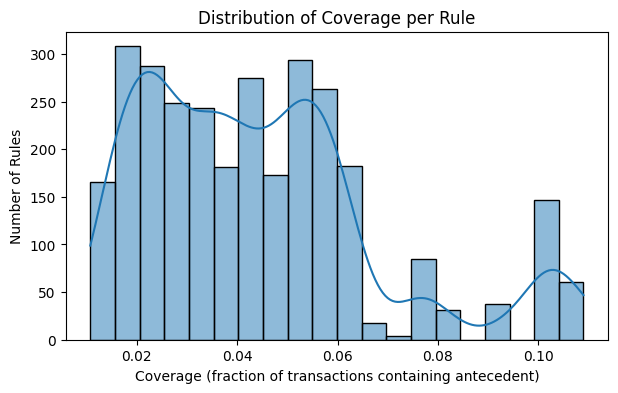

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7, 4))
sns.histplot(rules['coverage'], bins=20, kde=True)  
plt.title("Distribution of Coverage per Rule")
plt.xlabel("Coverage (fraction of transactions containing antecedent)")
plt.ylabel("Number of Rules")
plt.show()


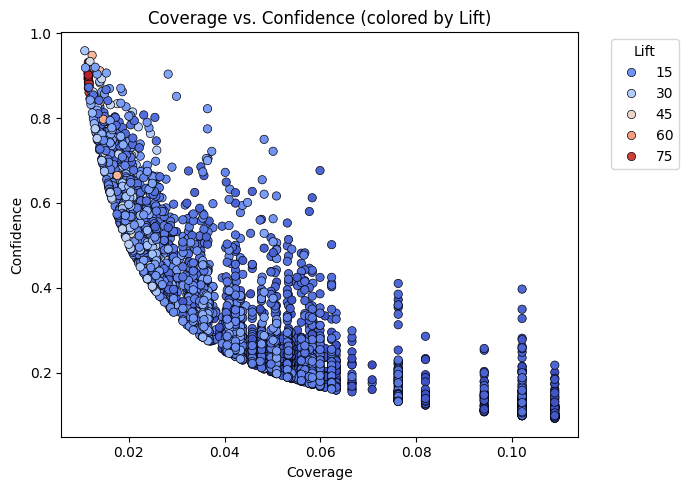

In [39]:
plt.figure(figsize=(7, 5))
scatter = sns.scatterplot(
    data=rules,
    x='coverage',
    y='confidence',
    hue='lift',       
    palette='coolwarm',
    edgecolor='black'
)

plt.title("Coverage vs. Confidence (colored by Lift)")
plt.xlabel("Coverage")
plt.ylabel("Confidence")
plt.legend(title="Lift", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Overall Coverage

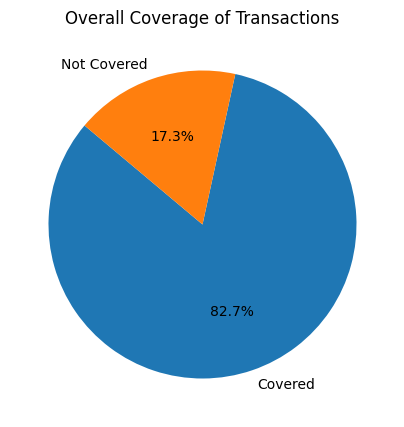

In [40]:
covered_count = int(overall_coverage * len(basket_list))
not_covered_count = len(basket_list) - covered_count

labels = ['Covered', 'Not Covered']
sizes = [covered_count, not_covered_count]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Overall Coverage of Transactions")
plt.show()


Adding Categories to items 

In [47]:
import pandas as pd



df_category = pd.read_excel("unique_items.xlsx")



df_category.rename(columns={"unique_items": "Itemname"}, inplace=True)


df_main = data_excel


df_merged = df_main.merge(
    df_category[["Itemname", "category"]],
    on="Itemname",
    how="left"
)


df_merged.to_excel('df_merged_items_category.xlsx', index=False)



Category Diversity, Simple Count / Distribution

Items per Category:
category
Kitchen & Dining            105749
Home Decor                   97277
Stationery & Office          47941
Seasonal & Holidays          40666
Kids & Toys                  40642
Textiles & Cozy Items        25770
Vintage & Collectibles       24355
Fashion & Accessories        24224
Party Supplies               23609
Storage & Organization       22690
Garden & Outdoor             18558
Crafts & DIY                 17090
Lighting                      7022
Games & Puzzles               7013
Electronics & Gadgets         5269
Bath & Body                   5024
Gifts & Special Occasion      3005
Pets & Animals                2012
no_list                        963
Books & Magazines              851
Miscellaneous                  754
Name: count, dtype: int64


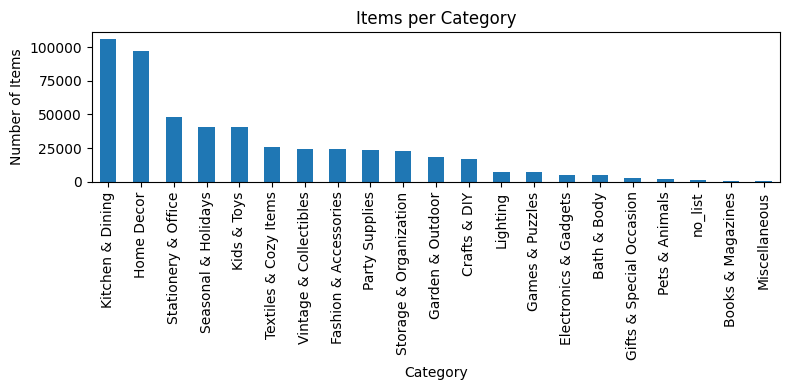

In [48]:
import pandas as pd


category_counts = df_merged['category'].value_counts(dropna=True)
print("Items per Category:")
print(category_counts)


import matplotlib.pyplot as plt
category_counts.plot(kind='bar', figsize=(8,4), title="Items per Category")
plt.xlabel("Category")
plt.ylabel("Number of Items")
plt.tight_layout()
plt.show()


Shannon Index 


In [49]:
import math

total_items = len(df_merged)
H = 0.0

for count in category_counts:
    p = count / total_items
    H -= p * math.log2(p)

print(f"Shannon diversity index (by category): {H:.3f}")


Shannon diversity index (by category): 3.589


Clustering 

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


df_items = df_merged[['Itemname', 'category']].drop_duplicates().reset_index(drop=True)


df_items['text_for_clustering'] = df_items['Itemname'] + " " + df_items['category']

df_items['text_for_clustering'].fillna('', inplace=True)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_items['text_for_clustering'])


kmeans = KMeans(n_clusters=5, random_state=42)
df_items['cluster'] = kmeans.fit_predict(X)


print(df_items[['Itemname', 'category', 'cluster']].head(20))

df_items.to_excel("items_with_clusters.xlsx", index=False)
print("Cluster assignments saved to 'items_with_clusters.xlsx'.")


C:\Users\moham\AppData\Local\Temp\ipykernel_29800\3442697342.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_items['text_for_clustering'].fillna('', inplace=True)


                               Itemname                category  cluster
0    WHITE HANGING HEART T-LIGHT HOLDER              Home Decor        1
1                   WHITE METAL LANTERN                Lighting        2
2        CREAM CUPID HEARTS COAT HANGER              Home Decor        1
3   KNITTED UNION FLAG HOT WATER BOTTLE   Textiles & Cozy Items        2
4        RED WOOLLY HOTTIE WHITE HEART.   Textiles & Cozy Items        2
5          SET 7 BABUSHKA NESTING BOXES  Vintage & Collectibles        2
6     GLASS STAR FROSTED T-LIGHT HOLDER              Home Decor        1
7                HAND WARMER UNION JACK   Textiles & Cozy Items        2
8             HAND WARMER RED POLKA DOT   Textiles & Cozy Items        2
9         ASSORTED COLOUR BIRD ORNAMENT              Home Decor        1
10            POPPY'S PLAYHOUSE BEDROOM             Kids & Toys        2
11            POPPY'S PLAYHOUSE KITCHEN             Kids & Toys        2
12    FELTCRAFT PRINCESS CHARLOTTE DOLL            

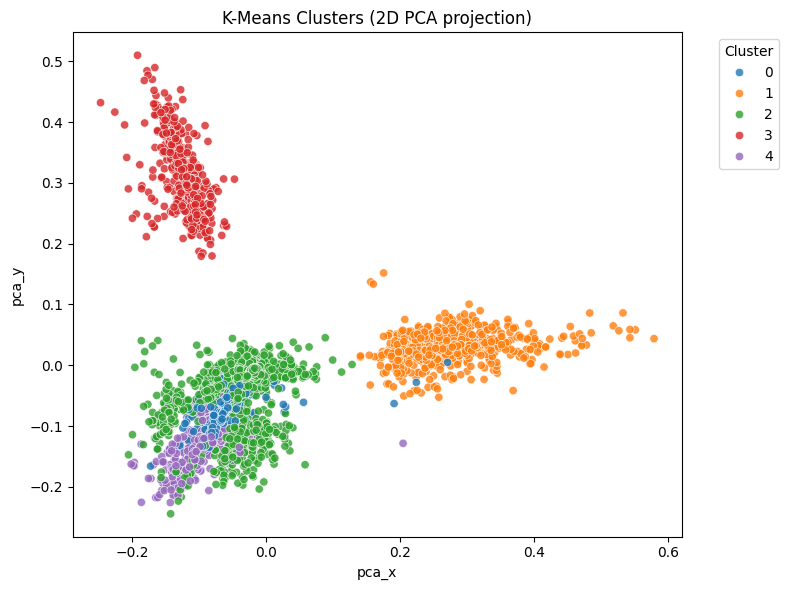

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


X_dense = X.toarray()  


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)


plot_df = pd.DataFrame({
    'pca_x': X_pca[:, 0],
    'pca_y': X_pca[:, 1],
    'cluster': df_items['cluster']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='pca_x', 
    y='pca_y', 
    hue='cluster',
    palette='tab10',
    alpha=0.8
)
plt.title("K-Means Clusters (2D PCA projection)")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df_category = pd.read_excel("df_merged_items_category.xlsx")


customer_transactions = df_category.groupby('CustomerID')['BillNo'].nunique()

customers_with_multiple_transactions = customer_transactions[customer_transactions > 1]



In [6]:
customers_with_multiple_transactions.to_excel("customers_with_multiple_transactions.xlsx", header=True)